## **Project: Study On Panel Data Methodologies With Application To Macroeconometrics (Inflation Forecasting)**.

> ### **Title**: Merge of Dataset.


#### **Table of Contents:**
<ul>
<li><a href="#1">1. .</a></li>
<li><a href="#2">2. .</a></li>
<li><a href="#3">3. .</a></li>
</ul>

<a id=''></a>

#### Final Dataset Table:

- > E. Table for data values `WEO_Data_Countries` name Columns {'WEO_Country_Code', 'Country', 'Advanced_Country', 'Years' , and all Varibles 'WEO_Subject_Code' {'BCA_NGDPD', 'GGR_NGDP', 'GGSB_NPGDP', 'GGX_NGDP', 'GGXWDG_NGDP', 'LUR', 'NGDP_RPCH', 'NGSD_NGDP', 'NID_NGDP', 'PCPIPCH', 'PPPEX', 'PPPPC', 'PPPSH', 'TM_RPCH', 'TRWMA', 'TX_RPCH'} }

In [1]:
# install 
#!pip install pandas linearmodels statsmodels matplotlib seaborn


**Import Library**

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import math

import statsmodels.api as sm
from linearmodels.panel import PanelOLS, RandomEffects, compare


sns.set(rc={'figure.figsize': [15,5]}, font_scale=1.2);
pd.set_option('future.no_silent_downcasting', True)


**Load Dataset**

In [15]:
df = pd.read_csv("../03-Dataset/01-Data_Clean.csv") # # 02-Data_Clean_EG_US.
print(df.shape)
display(df.head())

(1750, 20)


,WEO_Country_Code,Country,Advanced_Country,Year,BCA_NGDPD,GGR_NGDP,GGSB_NPGDP,GGXWDG_NGDP,GGX_NGDP,LUR,NGDP_RPCH,NGSD_NGDP,NID_NGDP,PCPIPCH,PPPEX,PPPPC,PPPSH,TM_RPCH,TRWMA,TX_RPCH
0,213,Argentina,0,2000,-2.878,21.830,-4.552,40.833,25.247,17.134,-0.789,12.459,15.337,-0.939,0.639,13529.290,0.995,-2.322,10.52,1.898
1,213,Argentina,0,2001,-1.316,21.068,-5.590,48.007,26.432,19.209,-4.409,12.325,13.640,-1.065,0.618,13091.488,0.929,-16.587,9.25,6.096
2,213,Argentina,0,2002,7.666,19.943,1.188,147.203,21.853,22.450,-10.894,17.631,9.965,25.869,0.794,11733.021,0.806,-53.558,12.01,0.244
3,213,Argentina,0,2003,5.597,23.526,3.453,125.162,22.026,17.250,8.955,18.474,12.877,13.443,0.859,12914.244,0.847,48.953,12.87,5.006
4,213,Argentina,0,2004,1.798,26.996,4.719,117.878,23.030,13.625,8.911,19.350,17.551,4.416,0.887,14308.616,0.878,51.050,5.96,-0.150


In [16]:
df_eu = df[(df["Country"]=="Egypt") | (df["Country"]=="United States")]
df_eu.sample(10)

,WEO_Country_Code,Country,Advanced_Country,Year,BCA_NGDPD,GGR_NGDP,GGSB_NPGDP,GGXWDG_NGDP,GGX_NGDP,LUR,NGDP_RPCH,NGSD_NGDP,NID_NGDP,PCPIPCH,PPPEX,PPPPC,PPPSH,TM_RPCH,TRWMA,TX_RPCH
1734,111,United States,1,2009,-2.623,28.222,-8.262000,86.598,41.399,9.283,-2.576,13.798,17.769,-0.320,1.000,47102.428,17.566,-12.627,1.710000,-8.311
1741,111,United States,1,2016,-2.107,30.977,-4.114000,106.582,35.333,4.875,1.820,18.472,20.888,1.267,1.000,58179.697,16.056,1.458,1.650000,0.474
485,469,Egypt,0,2010,-1.877,23.911,-8.585000,69.590,31.358,9.210,5.147,19.421,21.298,11.658,1.540,10469.188,0.940,-7.105,9.710000,-2.207
1745,111,United States,1,2020,-2.815,30.646,-10.599000,131.831,44.568,8.092,-2.163,18.232,21.419,1.249,1.000,64461.618,15.349,-8.979,1.520000,-13.127
1747,111,United States,1,2022,-3.892,32.385,-6.526000,118.617,36.308,3.633,2.512,18.315,21.950,7.992,1.000,77979.858,15.097,8.593,1.490000,7.513
489,469,Egypt,0,2014,-0.854,23.169,-11.000000,80.874,33.892,13.365,2.930,15.038,15.892,10.093,2.287,11295.056,0.909,3.879,7.430000,-12.786
494,469,Egypt,0,2019,-3.427,19.302,-7.346000,80.092,26.898,8.612,5.548,16.627,20.054,13.875,3.893,14532.979,1.031,3.381,10.430000,9.685
479,469,Egypt,0,2004,4.125,24.356,-8.866034,96.512,30.118,10.526,4.092,23.319,19.194,8.151,0.990,7440.463,0.827,10.121,10.630000,27.106
496,469,Egypt,0,2021,-4.355,18.588,-7.181000,89.903,25.543,7.292,3.253,10.816,15.172,4.500,3.855,16930.470,1.112,-3.788,14.704124,-10.629
1736,111,United States,1,2011,-2.919,29.080,-8.520000,99.498,38.796,8.933,1.564,16.238,19.034,3.140,1.000,50008.108,16.801,4.816,1.670000,7.178


In [17]:
df_eu.drop(columns=[ "WEO_Country_Code"],inplace=True)
panel_df = df_eu.set_index(['Country', 'Year'])
panel_df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10824\4079196470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eu.drop(columns=[ "WEO_Country_Code"],inplace=True)


Advanced_Country  BCA_NGDPD  GGR_NGDP  GGSB_NPGDP  GGXWDG_NGDP  \
Country Year                                                                   
Egypt   2000                 0     -1.110    27.313   -5.180974       71.687   
        2001                 0     -0.033    26.792   -5.572279       79.146   
        2002                 0      0.680    24.156   -7.964736       85.776   
        2003                 0      2.281    24.909   -9.193109       97.095   
        2004                 0      4.125    24.356   -8.866034       96.512   

              GGX_NGDP     LUR  NGDP_RPCH  NGSD_NGDP  NID_NGDP  PCPIPCH  \
Country Year                                                              
Egypt   2000    25.992   8.995      5.383     17.486    18.596    2.849   
        2001    27.862   8.808      3.524     17.334    17.366    2.417   
        2002    30.924  10.050      3.186     20.589    19.908    2.258   
        2003    30.638  11.275      3.193     21.601    19.320    3.412   
        2004    30.118  10.526      4.092     23.319    19.194    8.151   

              PPPEX     PPPPC  PPPSH  TM_RPCH  TRWMA  TX_RPCH  
Country Year                                                   
Egypt   2000  0.865  6457.169  0.827   -1.799  16.82    8.989  
        2001  0.862  6699.163  0.835    7.962  16.72    2.830  
        2002  0.869  6882.962  0.839   -7.030  19.89   -1.026  
        2003  0.910  7093.870  0.836   -5.437  15.04    8.146  
        2004  0.990  7440.463  0.827   10.121  10.63   27.106

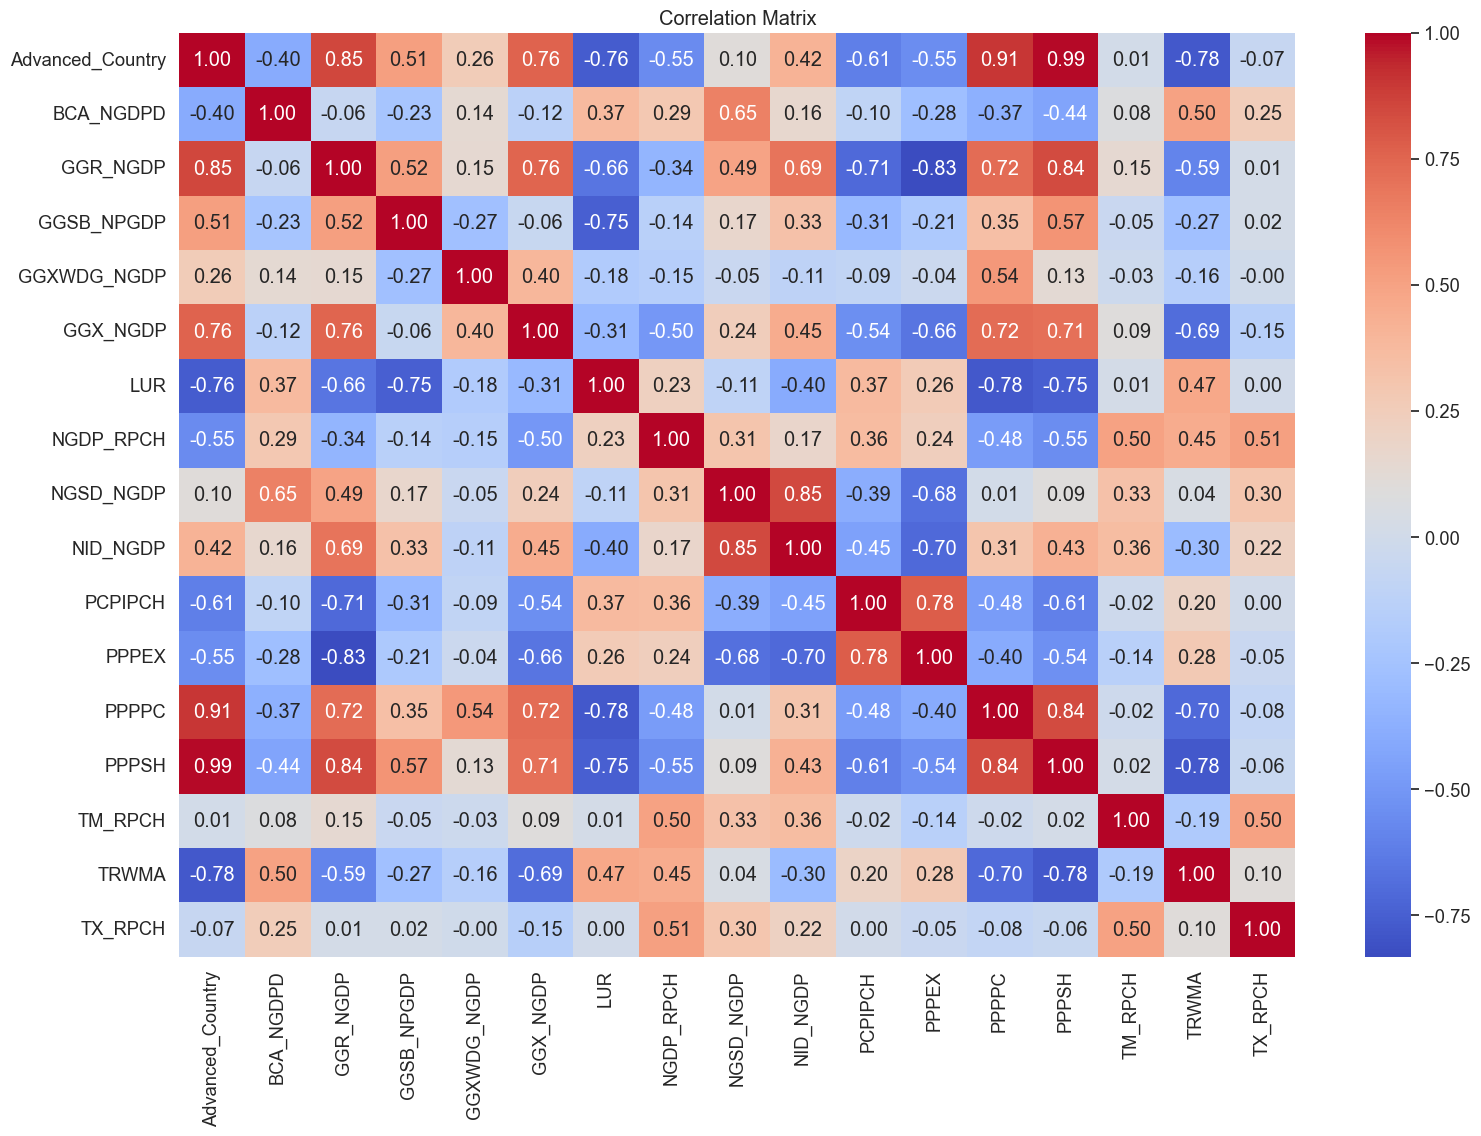

In [18]:

corr_matrix = panel_df.corr()

# رسم heatmap
plt.figure(figsize=(18,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()


In [20]:
panel_df['PCPIPCH_lag'] = panel_df.groupby(level=0)['PCPIPCH'].shift(1)
panel_df = panel_df.dropna(subset=['PCPIPCH_lag'])
panel_df.head()

Advanced_Country  BCA_NGDPD  GGR_NGDP  GGSB_NPGDP  GGXWDG_NGDP  \
Country Year                                                                   
Egypt   2001                 0     -0.033    26.792   -5.572279       79.146   
        2002                 0      0.680    24.156   -7.964736       85.776   
        2003                 0      2.281    24.909   -9.193109       97.095   
        2004                 0      4.125    24.356   -8.866034       96.512   
        2005                 0      3.092    23.623   -8.657919       98.263   

              GGX_NGDP     LUR  NGDP_RPCH  NGSD_NGDP  NID_NGDP  PCPIPCH  \
Country Year                                                              
Egypt   2001    27.862   8.808      3.524     17.334    17.366    2.417   
        2002    30.924  10.050      3.186     20.589    19.908    2.258   
        2003    30.638  11.275      3.193     21.601    19.320    3.412   
        2004    30.118  10.526      4.092     23.319    19.194    8.151   
        2005    30.310  11.468      4.472     24.297    21.205    8.703   

              PPPEX     PPPPC  PPPSH  TM_RPCH  TRWMA  TX_RPCH  PCPIPCH_lag  
Country Year                                                                
Egypt   2001  0.862  6699.163  0.835    7.962  16.72    2.830        2.849  
        2002  0.869  6882.962  0.839   -7.030  19.89   -1.026        2.417  
        2003  0.910  7093.870  0.836   -5.437  15.04    8.146        2.258  
        2004  0.990  7440.463  0.827   10.121  10.63   27.106        3.412  
        2005  1.019  7858.184  0.826   16.588   8.76    8.436        8.151

In [25]:


y = panel_df['PCPIPCH']
X = panel_df[['BCA_NGDPD', 'GGR_NGDP', 'GGSB_NPGDP', 'GGXWDG_NGDP', 'GGX_NGDP',
              'LUR', 'NGDP_RPCH', 'NGSD_NGDP', 'NID_NGDP', 'PPPEX', 'PPPPC', 'PPPSH',
              'TM_RPCH', 'TRWMA', 'TX_RPCH', "PCPIPCH_lag"]]

X = sm.add_constant(X)

# 5. بناء نموذج التأثيرات الثابتة (Fixed Effects)
model_fe = PanelOLS(y, X, entity_effects=True)
results_fe = model_fe.fit()
print("Fixed Effects Model Results")
print(results_fe.summary)

Fixed Effects Model Results
                          PanelOLS Estimation Summary                           
Dep. Variable:                PCPIPCH   R-squared:                        0.7364
Estimator:                   PanelOLS   R-squared (Between):              0.8440
No. Observations:                  48   R-squared (Within):               0.7364
Date:                Mon, May 19 2025   R-squared (Overall):              0.7795
Time:                        22:41:56   Log-likelihood                   -116.93
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      5.2380
Entities:                           2   P-value                           0.0000
Avg Obs:                       24.000   Distribution:                   F(16,30)
Min Obs:                       24.000                                           
Max Obs:                       24.000   F-statistic (robust):             5.2380


In [26]:
y = panel_df['PCPIPCH']
X = panel_df[['Advanced_Country','BCA_NGDPD', 'GGR_NGDP', 'GGSB_NPGDP', 'GGXWDG_NGDP', 'GGX_NGDP',
              'LUR', 'NGDP_RPCH', 'NGSD_NGDP', 'NID_NGDP', 'PPPEX', 'PPPPC', 'PPPSH',
              'TM_RPCH', 'TRWMA', 'TX_RPCH', "PCPIPCH_lag"]]


# 6. بناء نموذج التأثيرات العشوائية (Random Effects)
model_re = RandomEffects(y, X)
results_re = model_re.fit()
print("\nRandom Effects Model Results")
print(results_re.summary)



Random Effects Model Results
                        RandomEffects Estimation Summary                        
Dep. Variable:                PCPIPCH   R-squared:                        0.9195
Estimator:              RandomEffects   R-squared (Between):              1.0000
No. Observations:                  48   R-squared (Within):               0.7320
Date:                Mon, May 19 2025   R-squared (Overall):              0.9195
Time:                        22:42:01   Log-likelihood                   -117.33
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      20.834
Entities:                           2   P-value                           0.0000
Avg Obs:                       24.000   Distribution:                   F(17,31)
Min Obs:                       24.000                                           
Max Obs:                       24.000   F-statistic (robust):             20.83

In [84]:
from linearmodels.panel import PooledOLS

pooled_ols = PooledOLS(y, X)
pooled_ols_results = pooled_ols.fit()
print(pooled_ols_results.summary)


                          PooledOLS Estimation Summary                          
Dep. Variable:                PCPIPCH   R-squared:                        0.6797
Estimator:                  PooledOLS   R-squared (Between):              0.9243
No. Observations:                1680   R-squared (Within):               0.4795
Date:                Sun, May 18 2025   R-squared (Overall):              0.6797
Time:                        22:59:24   Log-likelihood                   -5422.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      207.57
Entities:                          70   P-value                           0.0000
Avg Obs:                       24.000   Distribution:                 F(17,1663)
Min Obs:                       24.000                                           
Max Obs:                       24.000   F-statistic (robust):             207.57
                            

In [29]:
from linearmodels.panel import RandomEffects

random_effects = RandomEffects(y, X)
random_effects_results = random_effects.fit()
print(random_effects_results.summary)


                        RandomEffects Estimation Summary                        
Dep. Variable:                PCPIPCH   R-squared:                        0.0827
Estimator:              RandomEffects   R-squared (Between):              0.4726
No. Observations:                1750   R-squared (Within):               0.0492
Date:                Sun, May 18 2025   R-squared (Overall):              0.2235
Time:                        22:24:30   Log-likelihood                   -6345.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      9.7725
Entities:                          70   P-value                           0.0000
Avg Obs:                       25.000   Distribution:                 F(16,1734)
Min Obs:                       25.000                                           
Max Obs:                       25.000   F-statistic (robust):             9.7725
                            

In [10]:
from linearmodels.panel import compare

comparison = compare({'Fixed Effects': fixed_effects_results, 'Random Effects': random_effects_results})
print(comparison)


                    Model Comparison                    
                         Fixed Effects    Random Effects
--------------------------------------------------------
Dep. Variable                  PCPIPCH           PCPIPCH
Estimator                     PanelOLS     RandomEffects
No. Observations                  1750              1750
Cov. Est.                   Unadjusted        Unadjusted
R-squared                       0.0274            0.2199
R-Squared (Within)              0.0274            0.0002
R-Squared (Between)             0.5690            0.9276
R-Squared (Overall)             0.1597            0.2199
F-statistic                     3.2597            32.610
P-value (F-stat)                0.0000            0.0000
=====================     ============   ===============
BCA_NGDPD                      -0.1282           -0.1229
                             (-1.5978)         (-1.4977)
GGR_NGDP                        0.1160            0.0262
                              (

In [11]:
import numpy as np

b = fixed_effects_results.params.values
B = random_effects_results.params.values
V_b = fixed_effects_results.cov
V_B = random_effects_results.cov
diff = b - B
diff_var = V_b - V_B
from scipy.stats import chi2
stat = np.dot(diff.T, np.linalg.inv(diff_var).dot(diff))
df = diff.shape[0]
p_value = 1 - chi2.cdf(stat, df)
print(f"Hausman test statistic: {stat}, p-value: {p_value}")


Hausman test statistic: 91.4344368560318, p-value: 5.35238520171788e-13


In [19]:
from linearmodels.panel import FirstDifferenceOLS

# إضافة المتغير المؤخر (lagged variable)
panel_df['PCPIPCH_lag'] = panel_df.groupby(level=0)['PCPIPCH'].shift(1)
panel_df = panel_df.dropna(subset=['PCPIPCH_lag'])
panel_df.head()

BCA_NGDPD  GGR_NGDP  GGSB_NPGDP  GGXWDG_NGDP  GGX_NGDP  \
Advanced_Country Year                                                           
0                2001     -1.316    21.068      -5.590       48.007    26.432   
                 2002      7.666    19.943       1.188      147.203    21.853   
                 2003      5.597    23.526       3.453      125.162    22.026   
                 2004      1.798    26.996       4.719      117.878    23.030   
                 2005      2.473    27.766       4.376       80.282    24.426   

                          LUR  NGDP_RPCH  NGSD_NGDP  NID_NGDP  PCPIPCH  PPPEX  \
Advanced_Country Year                                                           
0                2001  19.209     -4.409     12.325    13.640   -1.065  0.618   
                 2002  22.450    -10.894     17.631     9.965   25.869  0.794   
                 2003  17.250      8.955     18.474    12.877   13.443  0.859   
                 2004  13.625      8.911     19.350    17.551    4.416  0.887   
                 2005  11.575      8.852     21.362    18.888    9.642  0.949   

                           PPPPC  PPPSH  TM_RPCH  TRWMA  TX_RPCH  PCPIPCH_lag  
Advanced_Country Year                                                          
0                2001  13091.488  0.929  -16.587   9.25    6.096       -0.939  
                 2002  11733.021  0.806  -53.558  12.01    0.244       -1.065  
                 2003  12914.244  0.847   48.953  12.87    5.006       25.869  
                 2004  14308.616  0.878   51.050   5.96   -0.150       13.443  
                 2005  15911.199  0.913   18.243   5.22   11.583        4.416

In [20]:

fd_model = FirstDifferenceOLS(y_dyn, X_dyn)
fd_results = fd_model.fit()
print(fd_results.summary)


ValueError: cannot handle a non-unique multi-index!

In [21]:
print(panel_df.index.is_unique)
print(panel_df.index)


False
MultiIndex([(0, 2001),
            (0, 2002),
            (0, 2003),
            (0, 2004),
            (0, 2005),
            (0, 2006),
            (0, 2007),
            (0, 2008),
            (0, 2009),
            (0, 2010),
            ...
            (1, 2015),
            (1, 2016),
            (1, 2017),
            (1, 2018),
            (1, 2019),
            (1, 2020),
            (1, 2021),
            (1, 2022),
            (1, 2023),
            (1, 2024)],
           names=['Advanced_Country', 'Year'], length=1748)


<a id='1'></a>

### **1. :**

<a id='2'></a>

### **2. :**

<a id='3'></a>

### **3. Apply the interpolation to Missing Values:**

# **END**